In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_parquet('fish.parquet')

In [23]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [21]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


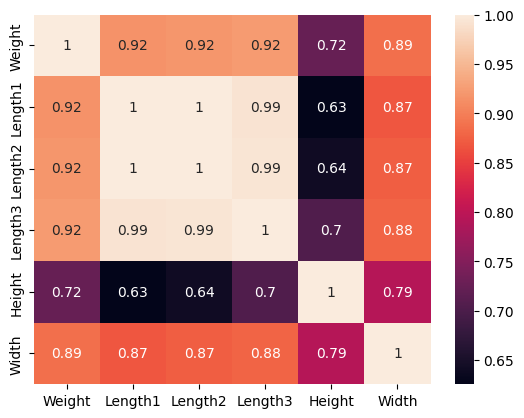

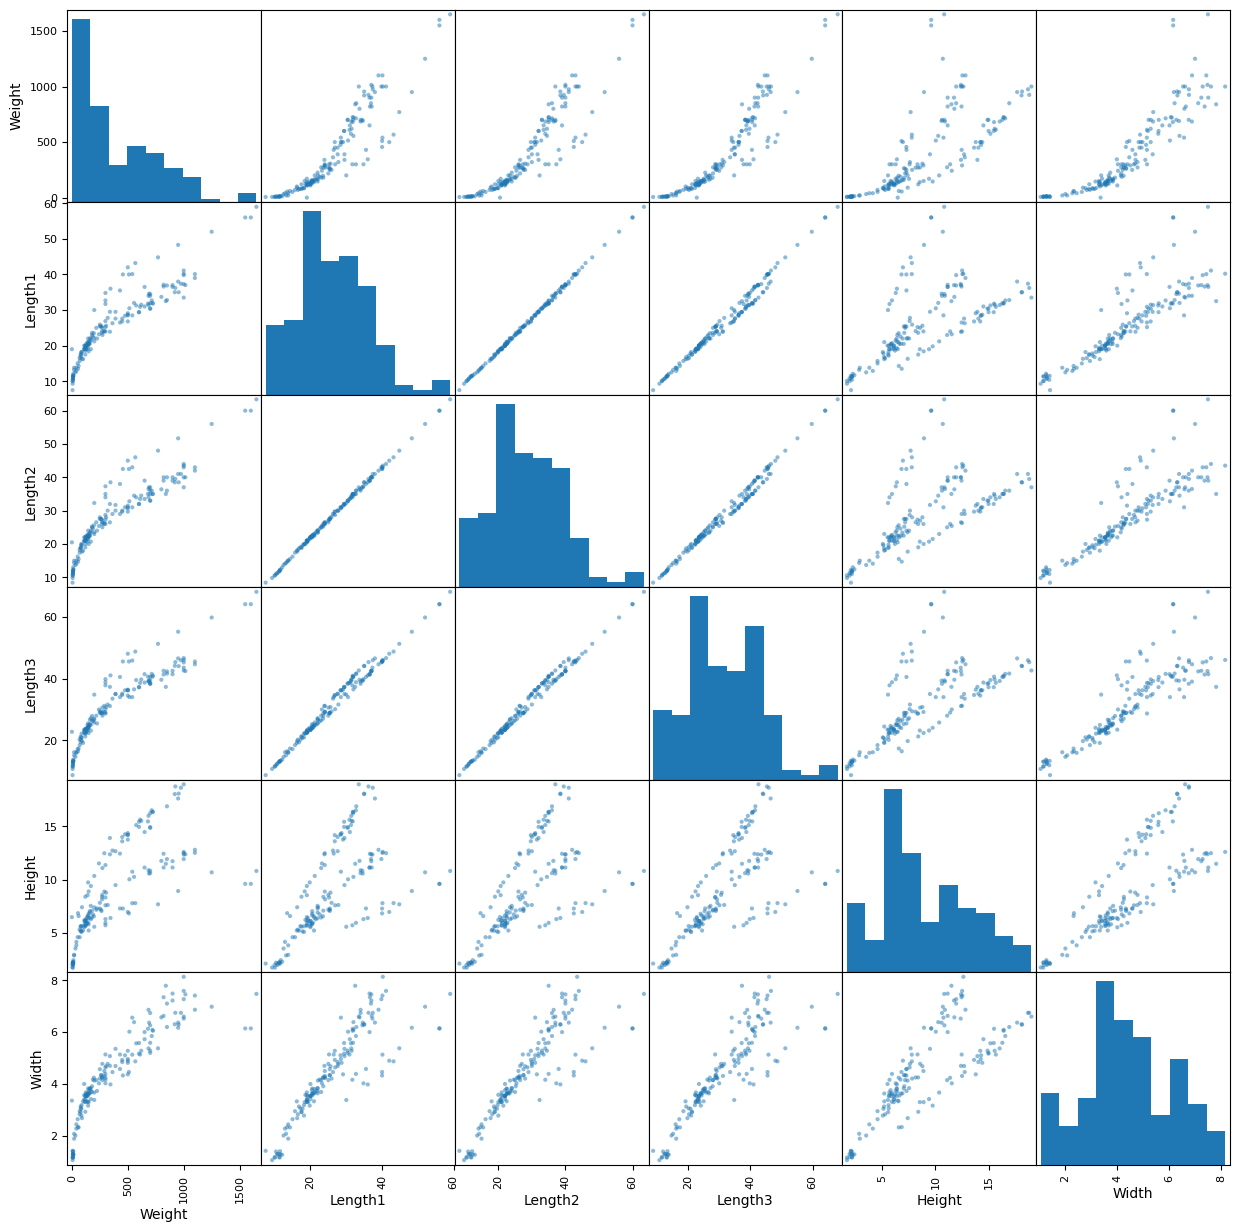

In [30]:
corrmat = df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']].corr()

sns.heatmap(corrmat, annot=True)
pd.plotting.scatter_matrix(df, figsize=(15, 15))

plt.show()

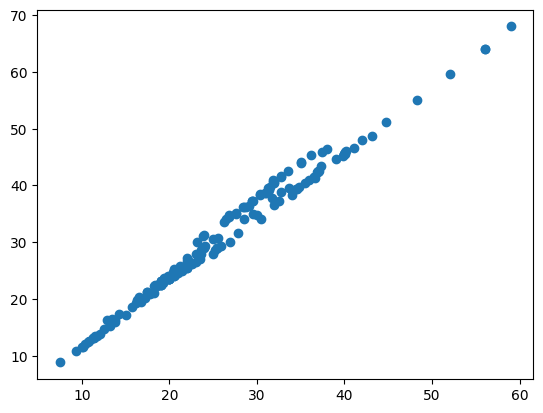

In [8]:
plt.scatter(df.Length1, df.Length3)
plt.show()

In [9]:
x,y = np.array(df.Length1).reshape(-1,1), np.array(df.Length3).reshape(-1,1)

In [10]:
regress_model = LinearRegression()

regress_model.fit(x,y)

LinearRegression()

In [11]:
y_predicted = regress_model.predict(x)

In [12]:
mse = mean_squared_error(y, y_predicted)
rmse = np.sqrt(mse)

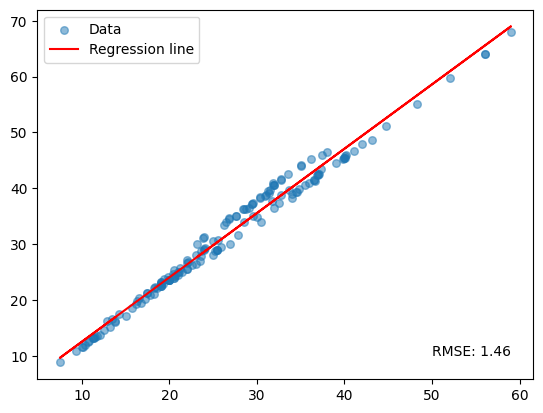

In [13]:
plt.scatter(x,y, s=30, alpha=.5, label='Data')
plt.plot(x, y_predicted.reshape(-1,1), label='Regression line', color='r')
plt.text(50, 10, f'RMSE: {rmse:.2f}')

plt.legend()
plt.show()